In [25]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import engutil 
import util

duration = 5.0
fs = 65138
#t_eval = np.linspace(0, duration, int(fs*duration))
#u = util.generate_pink_noise(len(t_eval), fs, fmin=1)


nonlinear_full = pd.read_csv("data/part2_simulations/01_nonlinear_full.csv")

#nonlinear_full = pd.read_csv("data/part2_simulations/02_nonlinear_stiffness_only.csv")

u = nonlinear_full["u"].to_numpy()
i = nonlinear_full["i"].to_numpy()
d = nonlinear_full["disp"].to_numpy()
v = nonlinear_full["vel"]
X = np.array([i,d,v])


len samples: 325690
nperseg = 21712.666666666668
len seconds: 5.0
Num avg: 30.000921149594696
freq res: 3.0000921149594695


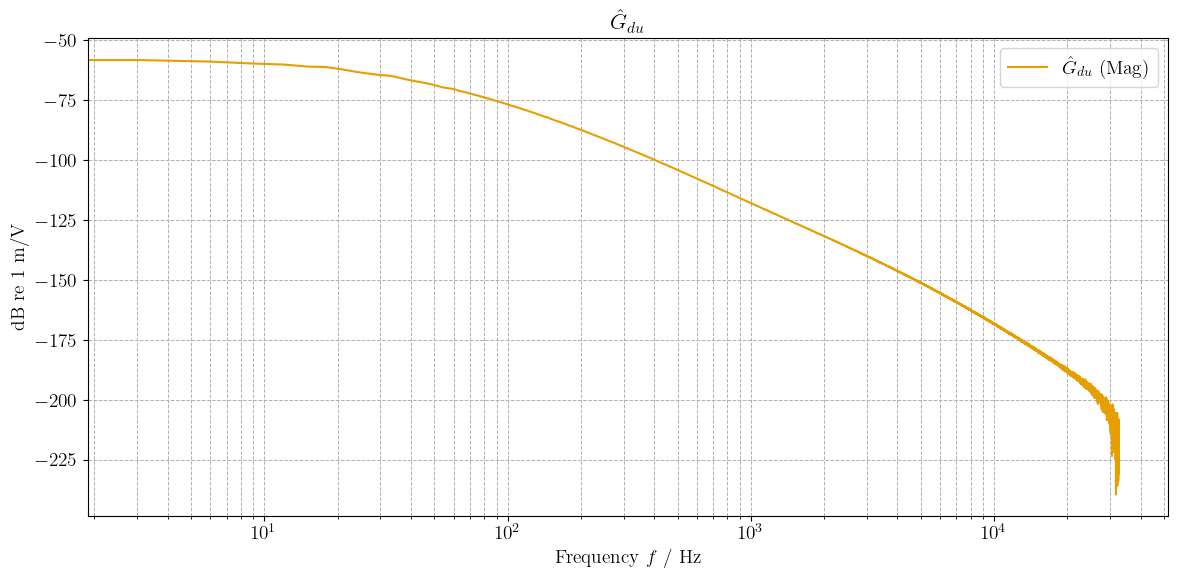

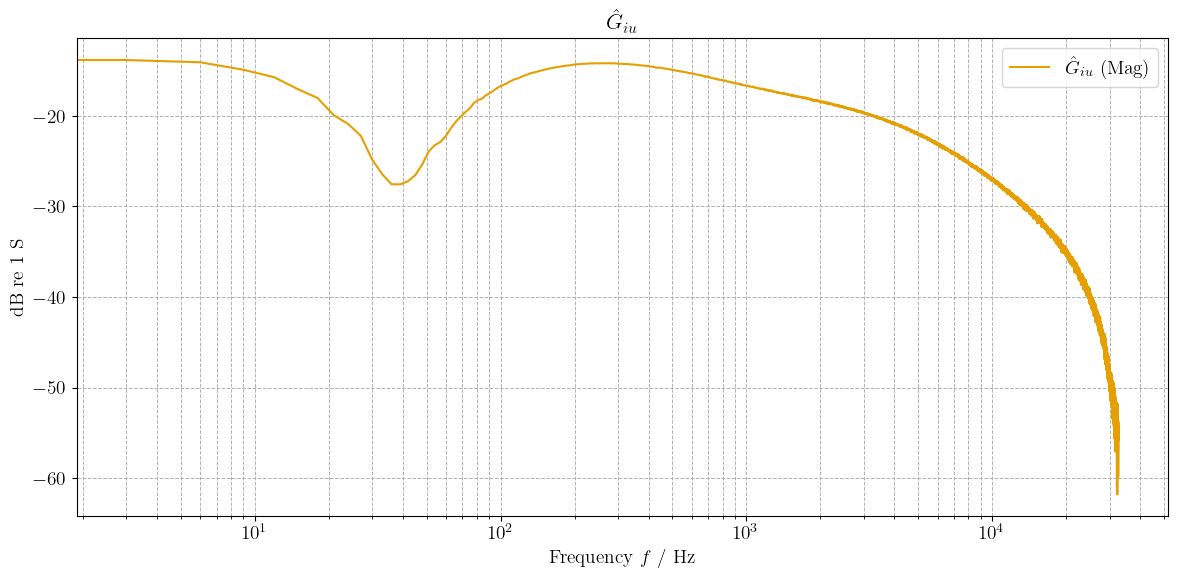

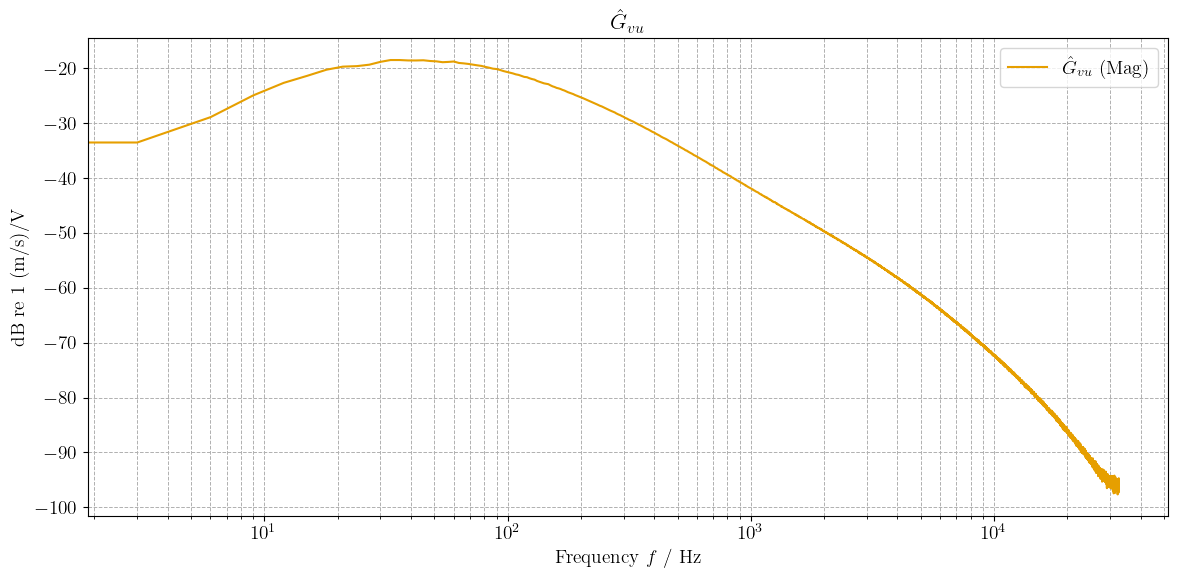

In [26]:

G_iu, G_du, G_vu, f = util.welchie(u, X, fs)
G_iu_mag_db, _, _ = engutil.tf_to_magphase(G_iu)
G_du_mag_db, _, _ = engutil.tf_to_magphase(G_du)
G_vu_mag_db, _, _ = engutil.tf_to_magphase(G_vu)


engutil.plot_bode(f, [(G_du_mag_db, None)], legends=["$\\hat{G}_{du}$"], title="$\\hat{G}_{du}$", ylabel_left="dB re 1 m/V")
engutil.plot_bode(f, [(G_iu_mag_db, None)], legends=["$\\hat{G}_{iu}$"], title="$\\hat{G}_{iu}$", ylabel_left="dB re 1 S")
engutil.plot_bode(f, [(G_vu_mag_db, None)], legends=["$\\hat{G}_{vu}$"], title="$\\hat{G}_{vu}$", ylabel_left="dB re 1 (m/s)/V")